In [15]:
!pip uninstall openpyxl
!pip install openpyxl

import pandas as pd
df = pd.read_excel('Public_Debt_Levels_All_Countries.xls', skiprows=[1])



^C


In [2]:
print(df)

    DEBT (% of GDP)     1800     1801     1802     1803     1804     1805  \
0       Afghanistan  no data  no data  no data  no data  no data  no data   
1           Albania  no data  no data  no data  no data  no data  no data   
2           Algeria  no data  no data  no data  no data  no data  no data   
3            Angola  no data  no data  no data  no data  no data  no data   
4          Anguilla  no data  no data  no data  no data  no data  no data   
..              ...      ...      ...      ...      ...      ...      ...   
190   G-20 Advanced    97.46    96.59   102.73   103.23   102.29   101.49   
191   G-20 Emerging  no data  no data  no data  no data  no data  no data   
192      Low Income  no data  no data  no data  no data  no data  no data   
193             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
194      ©IMF, 2023      NaN      NaN      NaN      NaN      NaN      NaN   

        1806     1807     1808  ...   2006   2007   2008   2009   2010   20

In [3]:
# List of countries to keep
countries_to_keep = ['Denmark', 'United Kingdom', 'Ireland']

# Filter rows based on the values in the first column
df_filtered = df[df['DEBT (% of GDP)'].isin(countries_to_keep)]

print(df_filtered)

    DEBT (% of GDP)     1800     1801     1802     1803     1804     1805  \
45          Denmark  no data  no data  no data  no data  no data  no data   
80          Ireland  no data  no data  no data  no data  no data  no data   
178  United Kingdom   176.84   177.47   188.99   190.67    188.4   189.07   

        1806     1807     1808  ...   2006   2007   2008   2009   2010  \
45   no data  no data  no data  ...  31.54  27.34  33.39  40.37  42.88   
80   no data  no data  no data  ...  24.81  25.01  44.34  61.68   86.3   
178   192.64   193.88   191.51  ...  41.02  42.21  50.27   64.2  75.74   

       2011    2012    2013    2014   2015  
45    46.41   45.19   44.65   44.77  45.53  
80   109.61  119.48  119.47  105.25  78.68  
178   81.32   84.82      86   87.94  88.98  

[3 rows x 217 columns]


In [4]:
df_transposed = df_filtered.transpose()

print(df_transposed)

                     45       80              178
DEBT (% of GDP)  Denmark  Ireland  United Kingdom
1800             no data  no data          176.84
1801             no data  no data          177.47
1802             no data  no data          188.99
1803             no data  no data          190.67
...                  ...      ...             ...
2011               46.41   109.61           81.32
2012               45.19   119.48           84.82
2013               44.65   119.47              86
2014               44.77   105.25           87.94
2015               45.53    78.68           88.98

[217 rows x 3 columns]


In [5]:
df_transposed_reset = df_transposed.reset_index()
print(df_transposed_reset)

               index       45       80             178
0    DEBT (% of GDP)  Denmark  Ireland  United Kingdom
1               1800  no data  no data          176.84
2               1801  no data  no data          177.47
3               1802  no data  no data          188.99
4               1803  no data  no data          190.67
..               ...      ...      ...             ...
212             2011    46.41   109.61           81.32
213             2012    45.19   119.48           84.82
214             2013    44.65   119.47              86
215             2014    44.77   105.25           87.94
216             2015    45.53    78.68           88.98

[217 rows x 4 columns]


In [6]:
headers = df_transposed_reset.iloc[0]
df = pd.DataFrame(df_transposed_reset.values[1:], columns = headers)
df = df.rename(columns={"DEBT (% of GDP)": "Year"})
print(df)

0    Year  Denmark  Ireland United Kingdom
0    1800  no data  no data         176.84
1    1801  no data  no data         177.47
2    1802  no data  no data         188.99
3    1803  no data  no data         190.67
4    1804  no data  no data          188.4
..    ...      ...      ...            ...
211  2011    46.41   109.61          81.32
212  2012    45.19   119.48          84.82
213  2013    44.65   119.47             86
214  2014    44.77   105.25          87.94
215  2015    45.53    78.68          88.98

[216 rows x 4 columns]


In [7]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(df)

# Reset display options to the default values (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

0    Year  Denmark  Ireland United Kingdom
0    1800  no data  no data         176.84
1    1801  no data  no data         177.47
2    1802  no data  no data         188.99
3    1803  no data  no data         190.67
4    1804  no data  no data          188.4
5    1805  no data  no data         189.07
6    1806  no data  no data         192.64
7    1807  no data  no data         193.88
8    1808  no data  no data         191.51
9    1809  no data  no data         188.99
10   1810  no data  no data         186.69
11   1811  no data  no data         182.51
12   1812  no data  no data         188.11
13   1813  no data  no data         196.74
14   1814  no data  no data         219.62
15   1815  no data  no data         226.31
16   1816  no data  no data         237.32
17   1817  no data  no data         231.09
18   1818  no data  no data         259.04
19   1819  no data  no data         260.29
20   1820  no data  no data         259.95
21   1821  no data  no data         260.34
22   1822  

In [8]:
df = df.iloc[136:,:]

print(df)

0    Year Denmark Ireland United Kingdom
136  1936   18.98   31.43         170.19
137  1937   17.91   31.26         158.69
138  1938    16.6   31.23         155.08
139  1939    15.3   37.42         149.68
140  1940   14.62   36.18         121.06
..    ...     ...     ...            ...
211  2011   46.41  109.61          81.32
212  2012   45.19  119.48          84.82
213  2013   44.65  119.47             86
214  2014   44.77  105.25          87.94
215  2015   45.53   78.68          88.98

[80 rows x 4 columns]


In [9]:
df = df.reset_index()
df = df.iloc[:,1:]
print(df)

0   Year Denmark Ireland United Kingdom
0   1936   18.98   31.43         170.19
1   1937   17.91   31.26         158.69
2   1938    16.6   31.23         155.08
3   1939    15.3   37.42         149.68
4   1940   14.62   36.18         121.06
..   ...     ...     ...            ...
75  2011   46.41  109.61          81.32
76  2012   45.19  119.48          84.82
77  2013   44.65  119.47             86
78  2014   44.77  105.25          87.94
79  2015   45.53   78.68          88.98

[80 rows x 4 columns]


C:\Users\conor\AppData\Local\Temp\ipykernel_9644\909366121.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('no data', pd.NA, inplace=True)


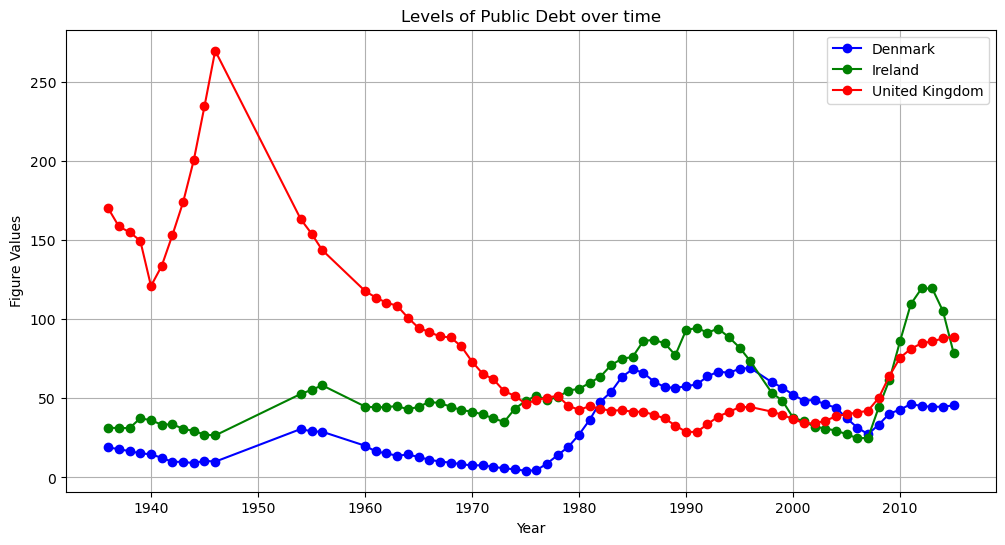

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert "no data" values to NaN
df.replace('no data', pd.NA, inplace=True)

# Convert the data columns to numeric type, handling errors
df[['Denmark', 'Ireland', 'United Kingdom']] = df[['Denmark', 'Ireland', 'United Kingdom']].apply(pd.to_numeric, errors='coerce')

# Plotting the Line Chart, excluding rows with "no data" values
df_filtered = df.dropna(subset=['Denmark', 'Ireland', 'United Kingdom'], how='any')


# Adjust the size of the figure (width, height) using the figsize parameter
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each country's line with specific colors
df_filtered.plot(x='Year', y='Denmark', marker='o', color='blue', ax=ax, label='Denmark')
df_filtered.plot(x='Year', y='Ireland', marker='o', color='green', ax=ax, label='Ireland')
df_filtered.plot(x='Year', y='United Kingdom', marker='o', color='red', ax=ax, label='United Kingdom')

# Setting the title and labels
plt.title('Levels of Public Debt over time')
plt.xlabel('Year')
plt.ylabel('Figure Values')

# Adding the grid and showing the plot
plt.grid(True)
plt.show()


In [13]:
inflation_df = pd.read_excel('Inflation_Rate_All_countries.xlsx', skiprows=4)
print(inflation_df)

ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

In [ ]:
inflation_df_filtered = inflation_df[inflation_df['Country Name'].isin(countries_to_keep)]
print(inflation_df_filtered)

In [ ]:
inflation_df_filtered = inflation_df_filtered.drop(columns=['Country Code', 'Indicator Code', 'Indicator Name'])
print(inflation_df_filtered)

In [ ]:
inflation_df_transposed = inflation_df_filtered.transpose()

print(inflation_df_transposed)

In [ ]:
inflation_df_transposed_reset = inflation_df_transposed.reset_index()
print(inflation_df_transposed_reset)

In [ ]:
headers = inflation_df_transposed_reset.iloc[0]
inflation_df = pd.DataFrame(inflation_df_transposed_reset.values[1:], columns = headers)
inflation_df = inflation_df.rename(columns={"Country Name": "Year"})
print(inflation_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the size of the figure (width, height) using the figsize parameter
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each country's line with specific colors
inflation_df.plot(x='Year', y='Denmark', marker='o', color='blue', ax=ax, label='Denmark')
inflation_df.plot(x='Year', y='Ireland', marker='o', color='green', ax=ax, label='Ireland')
inflation_df.plot(x='Year', y='United Kingdom', marker='o', color='red', ax=ax, label='United Kingdom')

# Setting the title and labels
plt.title('Levels of Inflation over time')
plt.xlabel('Year')
plt.ylabel('Figure Values')

# Adding the grid and showing the plot
plt.grid(True)
plt.show()


In [ ]:
GDP_df = pd.read_csv('GDP_Growth_all_countries.csv', skiprows=4)
print(GDP_df)

In [ ]:
GDP_df.head

In [ ]:
GDP_df_filtered = GDP_df[GDP_df['Country Name'].isin(countries_to_keep)]
GDP_df_filtered.head()

In [ ]:
GDP_df_filtered = GDP_df_filtered.drop(columns=['Country Code', 'Indicator Code', 'Indicator Name'])
GDP_df_filtered.head()

In [ ]:
GDP_df_transposed = GDP_df_filtered.transpose()

GDP_df_transposed.head()

In [ ]:
GDP_df_transposed_reset = GDP_df_transposed.reset_index()
GDP_df_transposed.head()

In [ ]:
headers = GDP_df_transposed_reset.iloc[0]
GDP_df = pd.DataFrame(GDP_df_transposed_reset.values[1:], columns = headers)
GDP_df = GDP_df.rename(columns={"Country Name": "Year"})
GDP_df.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the size of the figure (width, height) using the figsize parameter
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each country's line with specific colors
GDP_df.plot(x='Year', y='Denmark', marker='o', color='blue', ax=ax, label='Denmark')
GDP_df.plot(x='Year', y='Ireland', marker='o', color='green', ax=ax, label='Ireland')
GDP_df.plot(x='Year', y='United Kingdom', marker='o', color='red', ax=ax, label='United Kingdom')

# Setting the title and labels
plt.title('Levels of GDP over time')
plt.xlabel('Year')
plt.ylabel('Figure Values')

# Adding the grid and showing the plot
plt.grid(True)
plt.show()


In [ ]:
df_filtered.head()
df_filtered = df_filtered.rename(columns={"Denmark": "Denmark_Public_Debt_Pc_of_GDP"})
df_filtered = df_filtered.rename(columns={"United Kingdom": "United Kingdom_Public_Debt_Pc_of_GDP"})
df_filtered = df_filtered.rename(columns={"Ireland": "Ireland_Public_Debt_Pc_of_GDP"})
df_filtered.head()

In [ ]:

inflation_df = inflation_df.rename(columns={"Denmark": "Denmark_Inflation"})
inflation_df = inflation_df.rename(columns={"United Kingdom": "United Kingdom_Inflation"})
inflation_df = inflation_df.rename(columns={"Ireland": "Ireland_Inflation"})
inflation_df.head()

In [ ]:
GDP_df = GDP_df.rename(columns={"Denmark": "Denmark_GDP"})
GDP_df = GDP_df.rename(columns={"United Kingdom": "United Kingdom_GDP"})
GDP_df = GDP_df.rename(columns={"Ireland": "Ireland_GDP"})
GDP_df.head()

In [ ]:
merged_df = pd.merge(df_filtered, inflation_df, on='Year', how='outer')
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df.head()

In [ ]:
distinct_years = GDP_df['Year'].unique()
print(distinct_years)


In [ ]:
GDP_df = GDP_df[GDP_df['Year'] != 'Unnamed: 67']

GDP_df.reset_index(drop=True, inplace=True)

In [ ]:
distinct_years = GDP_df['Year'].unique()
print(distinct_years)

In [ ]:
GDP_df['Year'] = GDP_df['Year'].astype(int)
merged_df2 = pd.merge(merged_df, GDP_df, on='Year', how='outer')
merged_df2['Year'] = merged_df2['Year'].astype(int)
merged_df2.head()

In [ ]:
#merged_df2.to_csv('Merged_Datasets.csv', index=False)